# RNN and CURBD analysis - trial averaged data
### Mouse: M044
### Session: 2024_12_04_09_30

#### Imports

In [54]:
# imports
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
import sys
import os

# Add the project root to sys.path
import sys
sys.path.append('/data/PyalData')

import pyaldata as pyal
import pylab
from collections import Counter
import importlib

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# for RNN and CURBD
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd import rnn as rnnz
from tools.rnn_and_curbd import plotting as pltz
from tools.rnn_and_curbd import model_analysis as analyz
from tools.rnn_and_curbd import curbd as curbdz

importlib.reload(rnnz)
importlib.reload(pltz)
importlib.reload(analyz)
importlib.reload(curbdz)

np.random.seed(44)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load session data

In [55]:
data_dir = "/data/bnd-data/raw/M046/M046_2024_12_18_16_00"
mat1_file = "M046_2024_12_18_16_00_pyaldata_0.mat"
mat2_file = "M046_2024_12_18_16_00_pyaldata_1.mat"
fname0 = os.path.join(data_dir, mat1_file)
fname1 = os.path.join(data_dir, mat2_file)

In [67]:
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df = pd.concat([df0, df1], ignore_index=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.


### Preprocessing

In [60]:
for region in ["MOp", "SSp", "CP", "VAL"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 322
Neurons in SSp: 172
Neurons in CP: 501
Neurons in VAL: 223


In [61]:
for region in ["MOp", "SSp", "CP", "VAL"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 322
Neurons in SSp: 172
Neurons in CP: 501
Neurons in VAL: 223


In [68]:
df_ = preprocess(df, only_trials=True)
df_ = df_[df_['trial_length'] == 600]
df_ = pyal.merge_signals(df_, ["MOp_rates", "CP_rates", "SSp_rates", "VAL_rates"], "all_rates")

/data/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.87562189054727% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.87562189054727% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.87562189054727% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.87562189054727% of trials
  warnings.warn(
/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (202, 200)
Resulting SSp_spikes ephys data shape is (NxT): (105, 200)
Resulting all_spikes ephys data shape is (NxT): (12, 200)
Resulting MOp_spikes ephys data shape is (NxT): (182, 200)
Resulting CP_spikes ephys data shape is (NxT): (252, 200)


In [69]:
df_.head(10)

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,CP_unit_guide,CP_KSLabel,CP_spikes,VAL_rates,SSp_rates,all_rates,MOp_rates,CP_rates,sol_level_id,sol_contra_ipsi
0,M046,M046_2024_12_18_16_00,2,trial,600,0.03,10166,10366,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[37.90583610534668, 44.24274365107219, 43.185...","[[12.949475646018982, 11.510886748631796, 46.6...","[[0.0, 0.0, 0.0, 1.2970597793658576, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.2970597793658576, 0.0, 0.0,...","[[0.0, 0.005618831589041899, 0.914124337335427...",1,0
1,M046,M046_2024_12_18_16_00,4,trial,600,0.03,10533,10732,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[[39.20871019363403, 11.07786496480306, 31.753...","[[0.0, 24.460681279500328, 23.713503281275432,...","[[0.0, 0.0, 0.0, 0.0003196751701276905, 0.0, 0...","[[0.0, 0.0, 0.0, 0.0003196751701276905, 0.0, 0...","[[0.0, 7.115827997525534, 0.0, 0.0, 0.0, 17.71...",0,0
2,M046,M046_2024_12_18_16_00,6,trial,600,0.03,10833,11032,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[23.521089553833008, 37.743993600209556, 26.3...","[[0.0, 2.8335449596246085, 49.11950031916301, ...","[[0.0, 0.0, 0.0, 0.00397311378037557, 0.0, 0.0...","[[0.0, 0.0, 0.0, 0.00397311378037557, 0.0, 0.0...","[[0.0, 16.632215181986492, 0.0, 0.0, 0.2123920...",1,1
3,M046,M046_2024_12_18_16_00,8,trial,600,0.03,11066,11266,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[38.046836853027344, 24.078291654586792, 46.4...","[[0.0, 19.451226790746055, 34.4277818997701, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00397311378037557...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00397311378037557...","[[0.0, 0.3043408195177714, 0.03477109130471945...",1,1
4,M046,M046_2024_12_18_16_00,10,trial,600,0.03,11366,11566,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[21.817700068155926, 13.931336998939514, 40.3...","[[6.201383968194326, 3.011617809534073, 33.147...","[[0.0, 0.0, 12.949475646018982, 0.034771091304...","[[0.0, 0.0, 12.949475646018982, 0.034771091304...","[[0.0, 16.875086228052776, 0.0, 0.0, 0.0039731...",0,1
5,M046,M046_2024_12_18_16_00,12,trial,600,0.03,11599,11799,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[31.28671447436015, 32.42085377375285, 17.467...","[[0.03477109130471945, 0.9144439672430357, 48....","[[0.0, 0.2123920402179162, 0.0, 0.949347515900...","[[0.0, 0.2123920402179162, 0.0, 0.949347515900...","[[0.0, 16.054235895474754, 0.0, 0.0, 0.0, 13.0...",0,1
6,M046,M046_2024_12_18_16_00,14,trial,600,0.03,11899,12099,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[33.931287129720054, 3.0111658076445265, 44.5...","[[0.0, 6.201383968194326, 40.00564018885295, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.79...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.79...","[[0.0, 19.15117899576823, 10.218119621276855, ...",1,0
7,M046,M046_2024_12_18_16_00,16,trial,600,0.03,12199,12399,[],[],...,"[[0, 2], [1, 1], [4, 1], [5, 1], [5, 2], [6, 1...","[mua, mua, good, good, mua, good, good, mua, m...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[[38.87796799341838, 30.101452271143597, 20.15...","[[0.0, 0.2123920402179162, 49.9393900235494, 1...","[[0.0, 0.

### Some parameters

In [70]:
# Get mouse number
mouse = mat1_file.split('_')[0]

# column names
areas = ["MOp_rates", "SSp_rates", "CP_rates", "VAL_rates"]

# perturbation time
perturbation_time = df_.idx_sol_on[0]
perturbation_time_sec = df_.idx_sol_on[0] * df['bin_size'][0]

# bin size
BIN_SIZE = df['bin_size'][0]

# solenoid angles
sol_angles: list = df_.values_Sol_direction.unique()
sol_angles.sort()

# number of trials
num_trials = len(df_)
print(f"Number of trials: {num_trials}")

# Set interpolation factor for RNN 
dtFactor = 2

Number of trials: 399


### Conactanate trials only

In [72]:
# getting trial avg data
trial_avg_rates = rnnz.average_by_trial(df_, sol_angles)
shapes = [arr.shape[0] for arr in trial_avg_rates]

# concatenate data
concat_rates = np.concatenate(trial_avg_rates, axis=0)

print("Averaged activity shape:", trial_avg_rates.shape)
print("Concatenated average activity shape:", concat_rates.shape)

# set up for RNN
trial_avg_activity = np.transpose(concat_rates)
reset_points = rnnz.get_reset_points(df_, trial_avg_activity, areas, dtFactor)
regions_arr = rnnz.get_regions(df_, areas)

print(f"Building {len(regions_arr)} region RNN network")
print(f"Regions: {[region[0] for region in regions_arr]}\n")

Averaged activity shape: (11, 200, 741)
Concatenated average activity shape: (2200, 741)
Trial length: 200
Building 4 region RNN network
Regions: ['MOp', 'SSp', 'CP', 'VAL']



### Plot RNN input

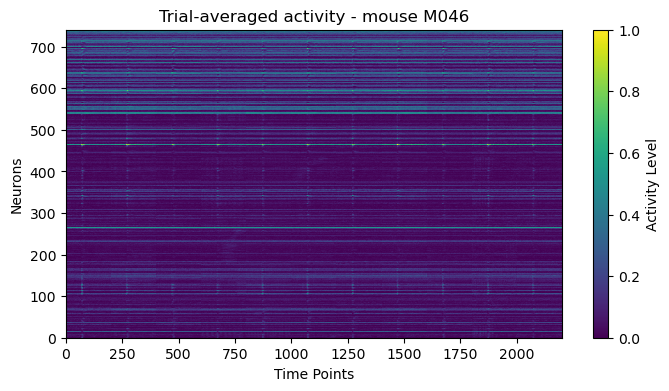

In [73]:
pltz.plot_neuron_activity(rnnz.rescale_array(trial_avg_activity.T), "Trial-averaged activity", mouse)

## RNN training

In [74]:
# RNN hyperparameters
dtFactor = 2 # Set interpolation factor for RNN 
nRunTrain = 5

reset points length: 399
last reset at: 159200
RNN input shape: (741, 2200)
trial=0 pVar=0.943703 chi2=1.049554
trial=1 pVar=0.959192 chi2=0.780646
trial=2 pVar=0.959936 chi2=0.768092
trial=3 pVar=0.960837 chi2=0.750090
trial=4 pVar=0.962190 chi2=0.723127
trial=5 pVar=0.957976 chi2=0.809481


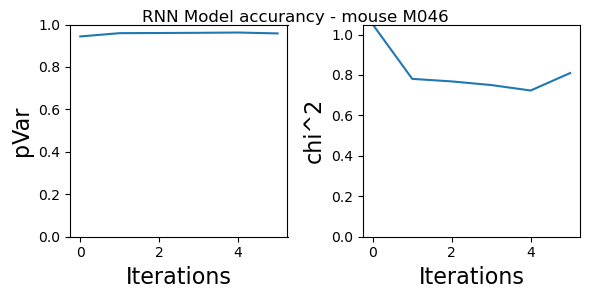

In [75]:
rnn_model, rnn_accuracy_fig = rnnz.run_rnn(trial_avg_activity, reset_points, regions_arr, df_, mouse, dtFactor = dtFactor, nRunTrain = nRunTrain)

### Plot RNN output

In [78]:
rnn_model_ = rnn_model.copy()
rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

RNN model output transformed from shape: (741, 4399) to (741, 2200). Matching the original data shape of (741, 2200)


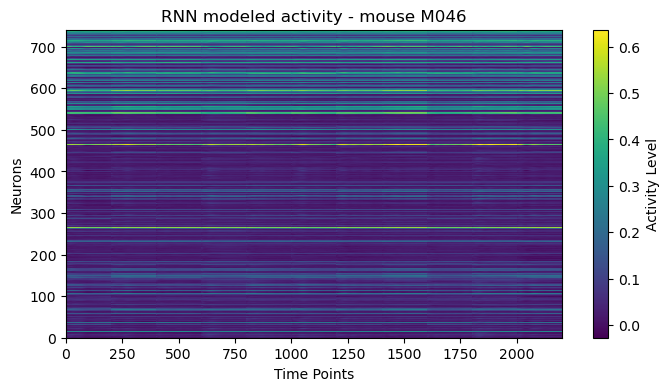

In [79]:
pltz.plot_neuron_activity(rnn_model_['RNN'].T, "RNN modeled activity", mouse)

## Analysis of model fit

### PCA whole model

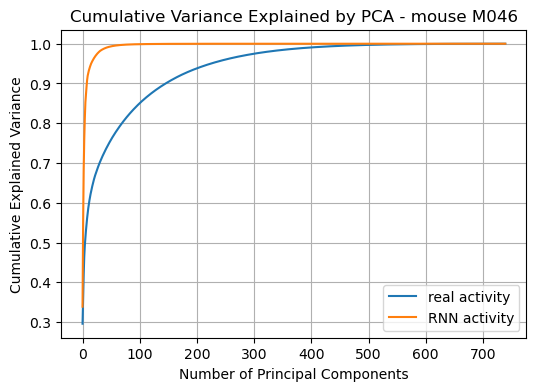

In [80]:
rnn_activity = rnn_model_['RNN'].T
real_activity = rnn_model_['Adata'].T
num_components = rnn_activity.shape[1] - 1

pca_real, pca_data_real = analyz.pca_fit_transform(real_activity, num_components)
pca_rnn, pca_data_rnn = analyz.pca_fit_transform(rnn_activity, num_components)

variance_figure = pltz.plot_pca_cum_var(pca_real, pca_rnn, mouse)

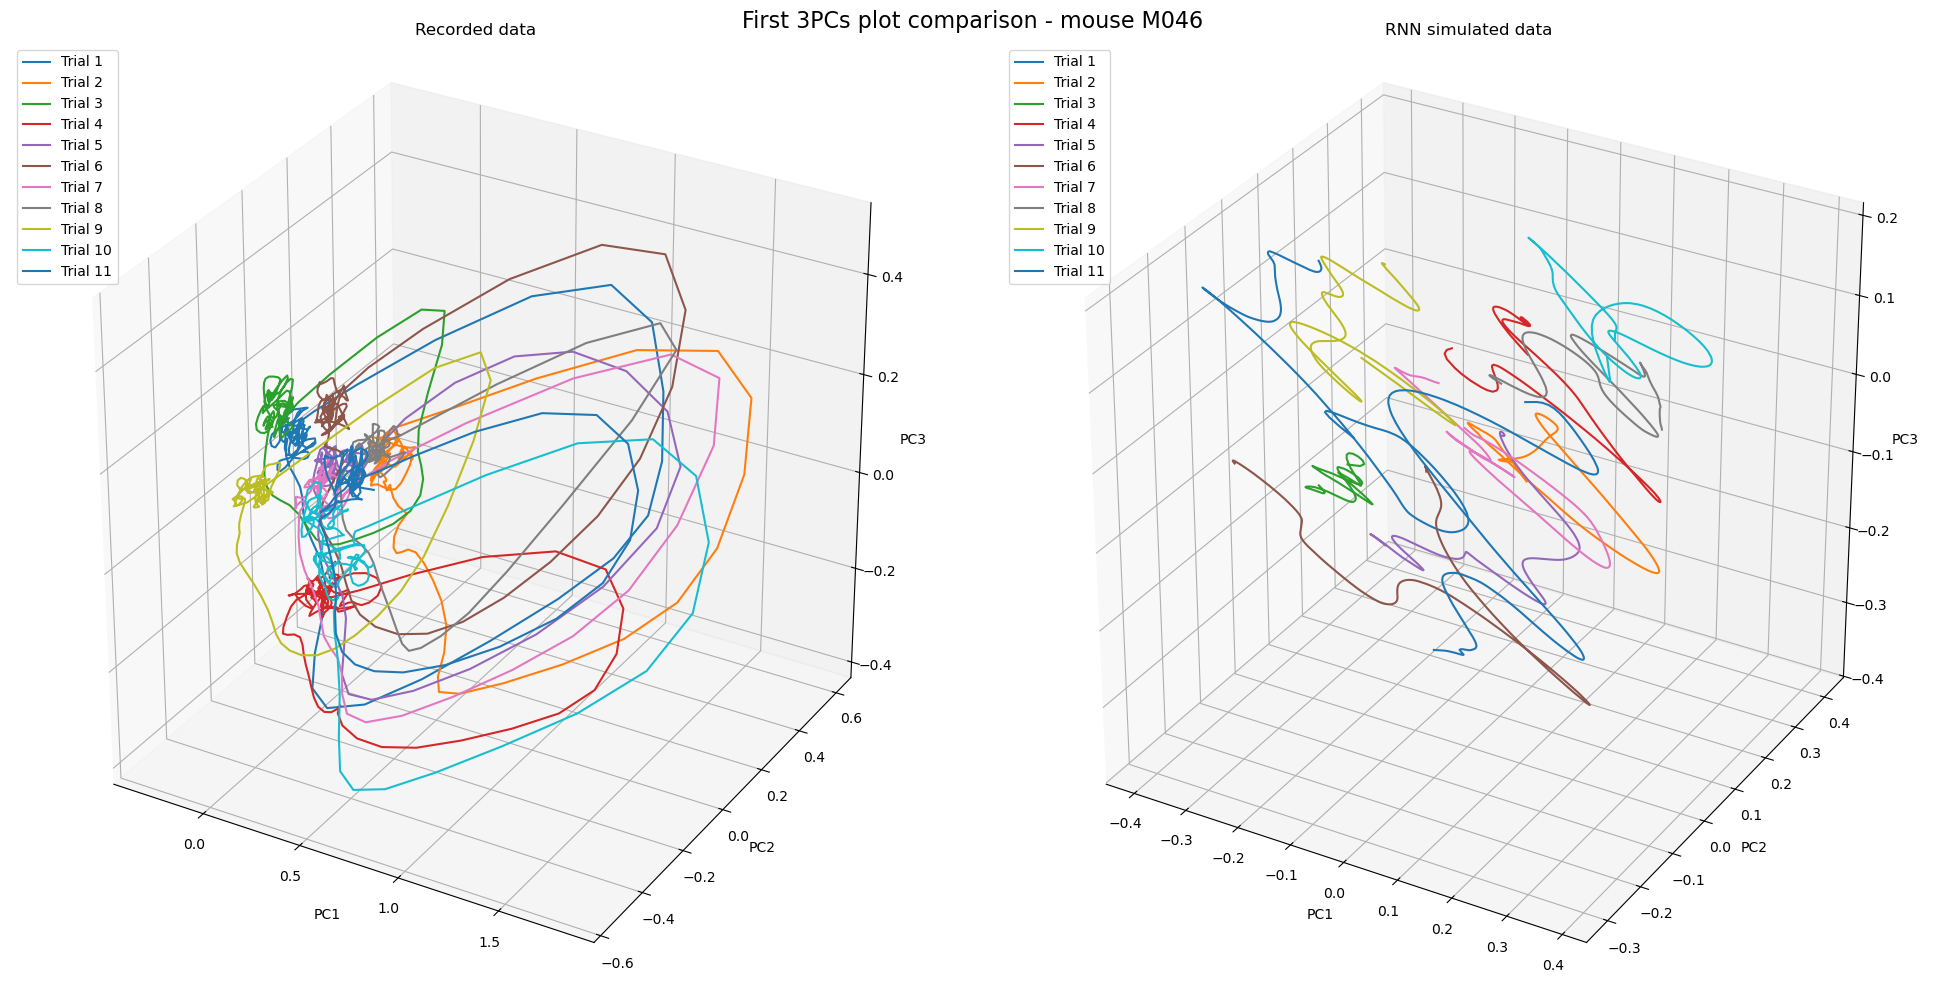

In [81]:
PCA_figure = pltz.plot_pca(pca_data_real, pca_data_rnn, shapes, mouse)

### CCA

In [82]:
model_cca = analyz.canoncorr(pca_data_real, pca_data_rnn)
ctrl1_cca = analyz.canoncorr(pca_data_real, pca_data_real)
ctrl2_cca = analyz.canoncorr(pca_data_rnn, pca_data_rnn)

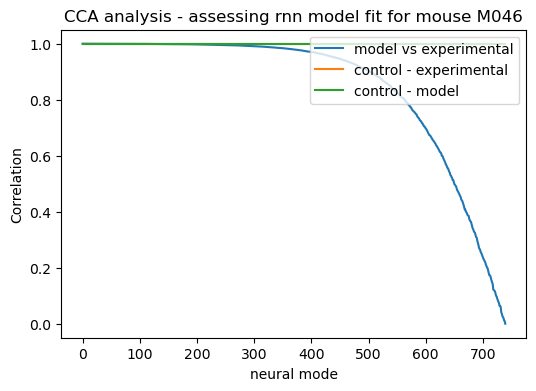

In [83]:
cca_figure = pltz.plot_cca(model_cca, ctrl1_cca, ctrl2_cca, mouse)

### PCA by brain region

In [84]:
PCA_data_real, pcas_real = analyz.pca_by_region(real_activity, regions_arr)
PCA_data_rnn, pcas_rnn = analyz.pca_by_region(rnn_activity, regions_arr)

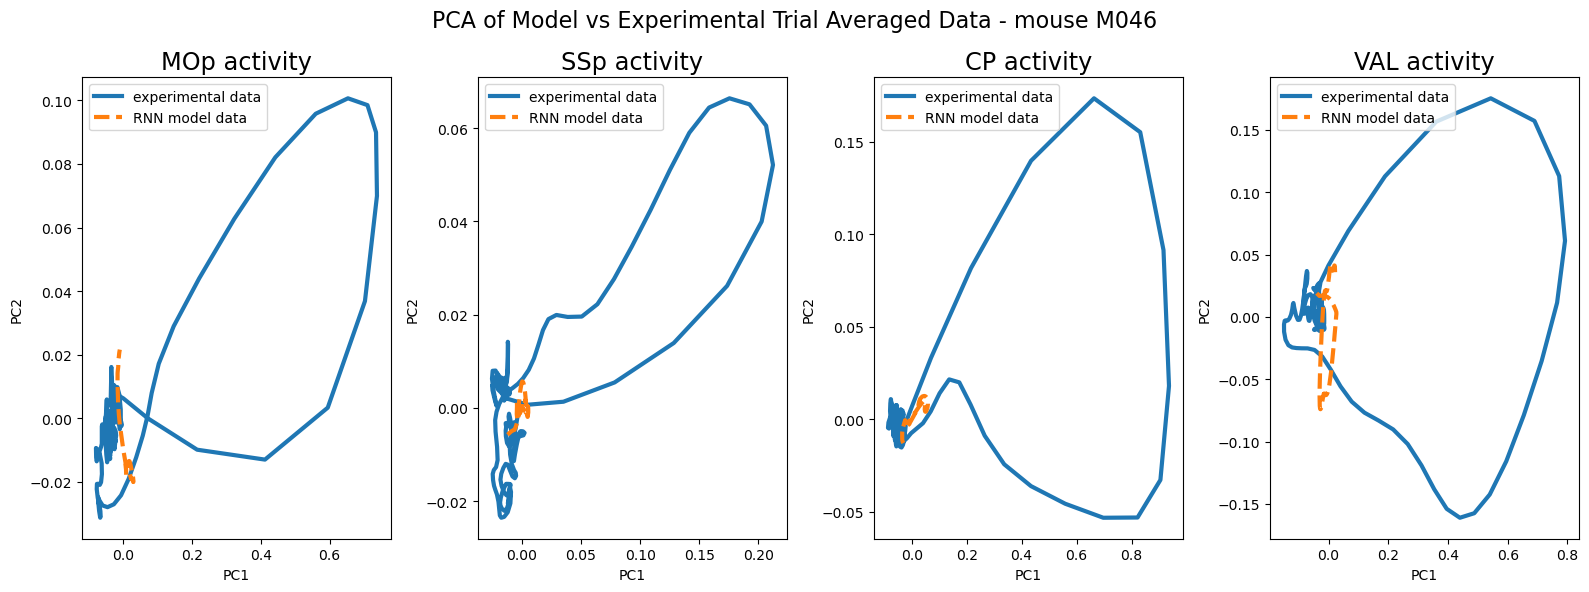

In [85]:
figure = pltz.plot_pca_by_region(PCA_data_real, PCA_data_rnn, shapes, regions_arr, mouse)

### Weight matrix

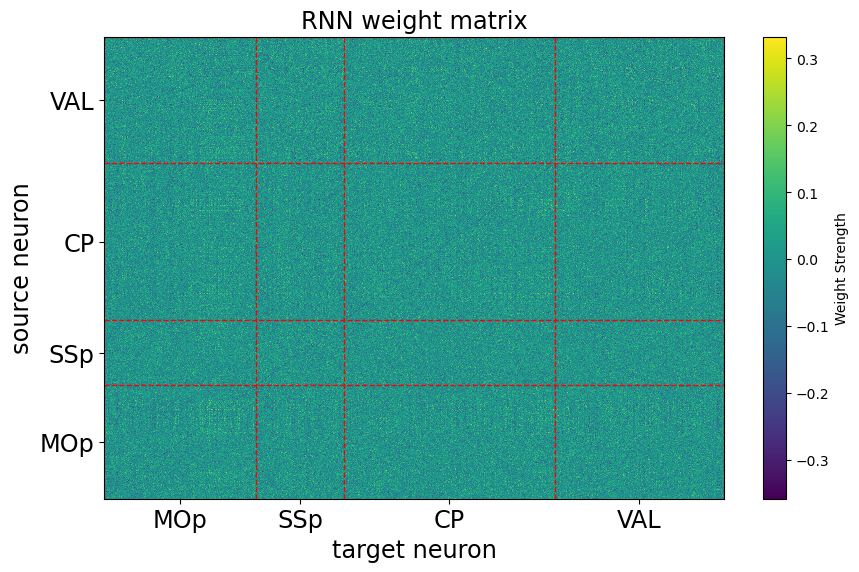

In [86]:
weight_matrix_fig = pltz.plot_rnn_weight_matrix(rnn_model, regions_arr)

### Firing rate analysis

In [87]:
print(reset_points)

[0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000, 8400, 8800, 9200, 9600, 10000, 10400, 10800, 11200, 11600, 12000, 12400, 12800, 13200, 13600, 14000, 14400, 14800, 15200, 15600, 16000, 16400, 16800, 17200, 17600, 18000, 18400, 18800, 19200, 19600, 20000, 20400, 20800, 21200, 21600, 22000, 22400, 22800, 23200, 23600, 24000, 24400, 24800, 25200, 25600, 26000, 26400, 26800, 27200, 27600, 28000, 28400, 28800, 29200, 29600, 30000, 30400, 30800, 31200, 31600, 32000, 32400, 32800, 33200, 33600, 34000, 34400, 34800, 35200, 35600, 36000, 36400, 36800, 37200, 37600, 38000, 38400, 38800, 39200, 39600, 40000, 40400, 40800, 41200, 41600, 42000, 42400, 42800, 43200, 43600, 44000, 44400, 44800, 45200, 45600, 46000, 46400, 46800, 47200, 47600, 48000, 48400, 48800, 49200, 49600, 50000, 50400, 50800, 51200, 51600, 52000, 52400, 52800, 53200, 53600, 54000, 54400, 54800, 55200, 55600, 56000, 56400, 56800, 57200, 57600, 58000, 58400, 

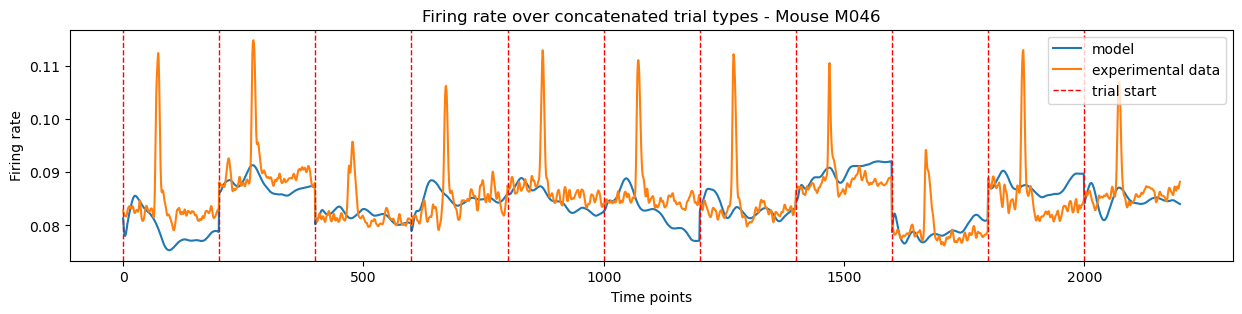

In [88]:
fr_fig = pltz.plot_firing_rates(rnn_model_, reset_points, mouse)

/home/zms24/Desktop/earthquake-analysis/tools/rnn_and_curbd/plotting.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


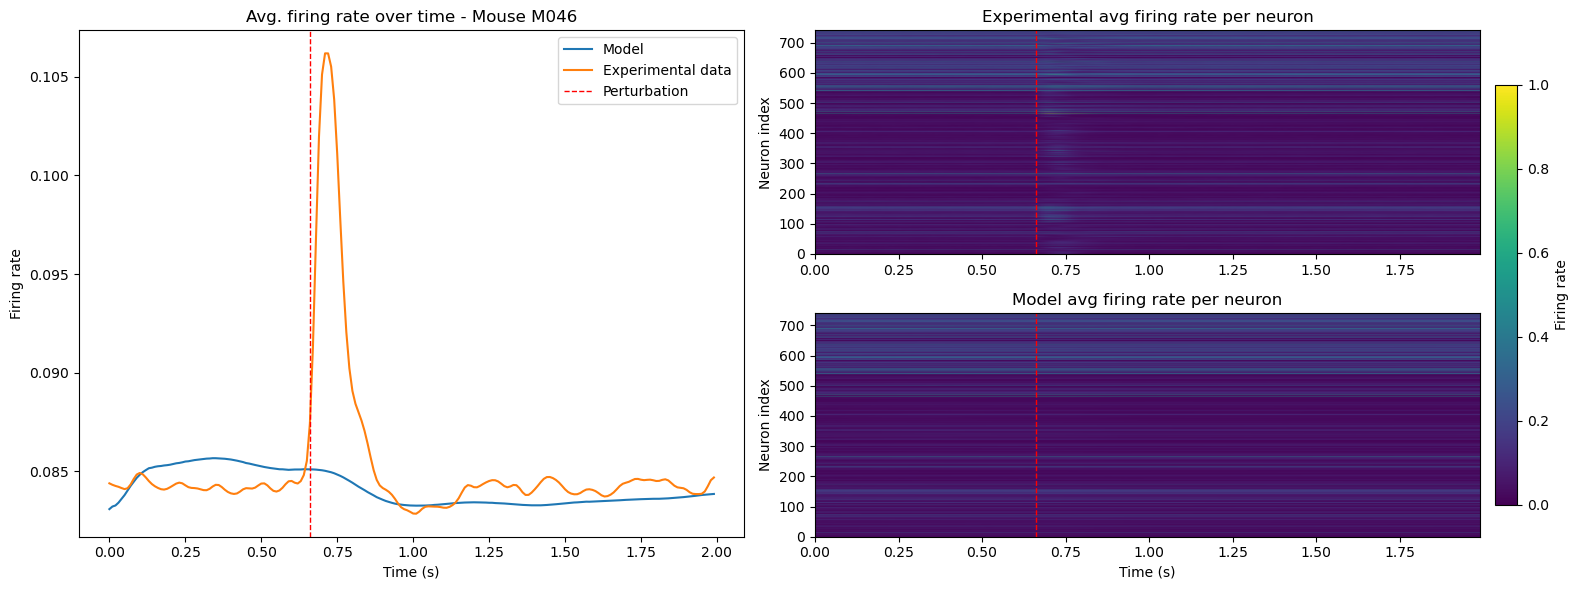

In [89]:
avg_fr_fig = pltz.plot_avg_firing_rates(rnn_model_, shapes, perturbation_time_sec, bin_size=BIN_SIZE, mouse_num=mouse)

## CURBD

In [90]:
curbd_arr, curbd_labels = curbd.computeCURBD(rnn_model)
n_regions = curbd_arr.shape[0]

In [91]:
currents, current_labels = curbdz.format_curbd_output(curbd_arr, curbd_labels, n_regions, reset_points)

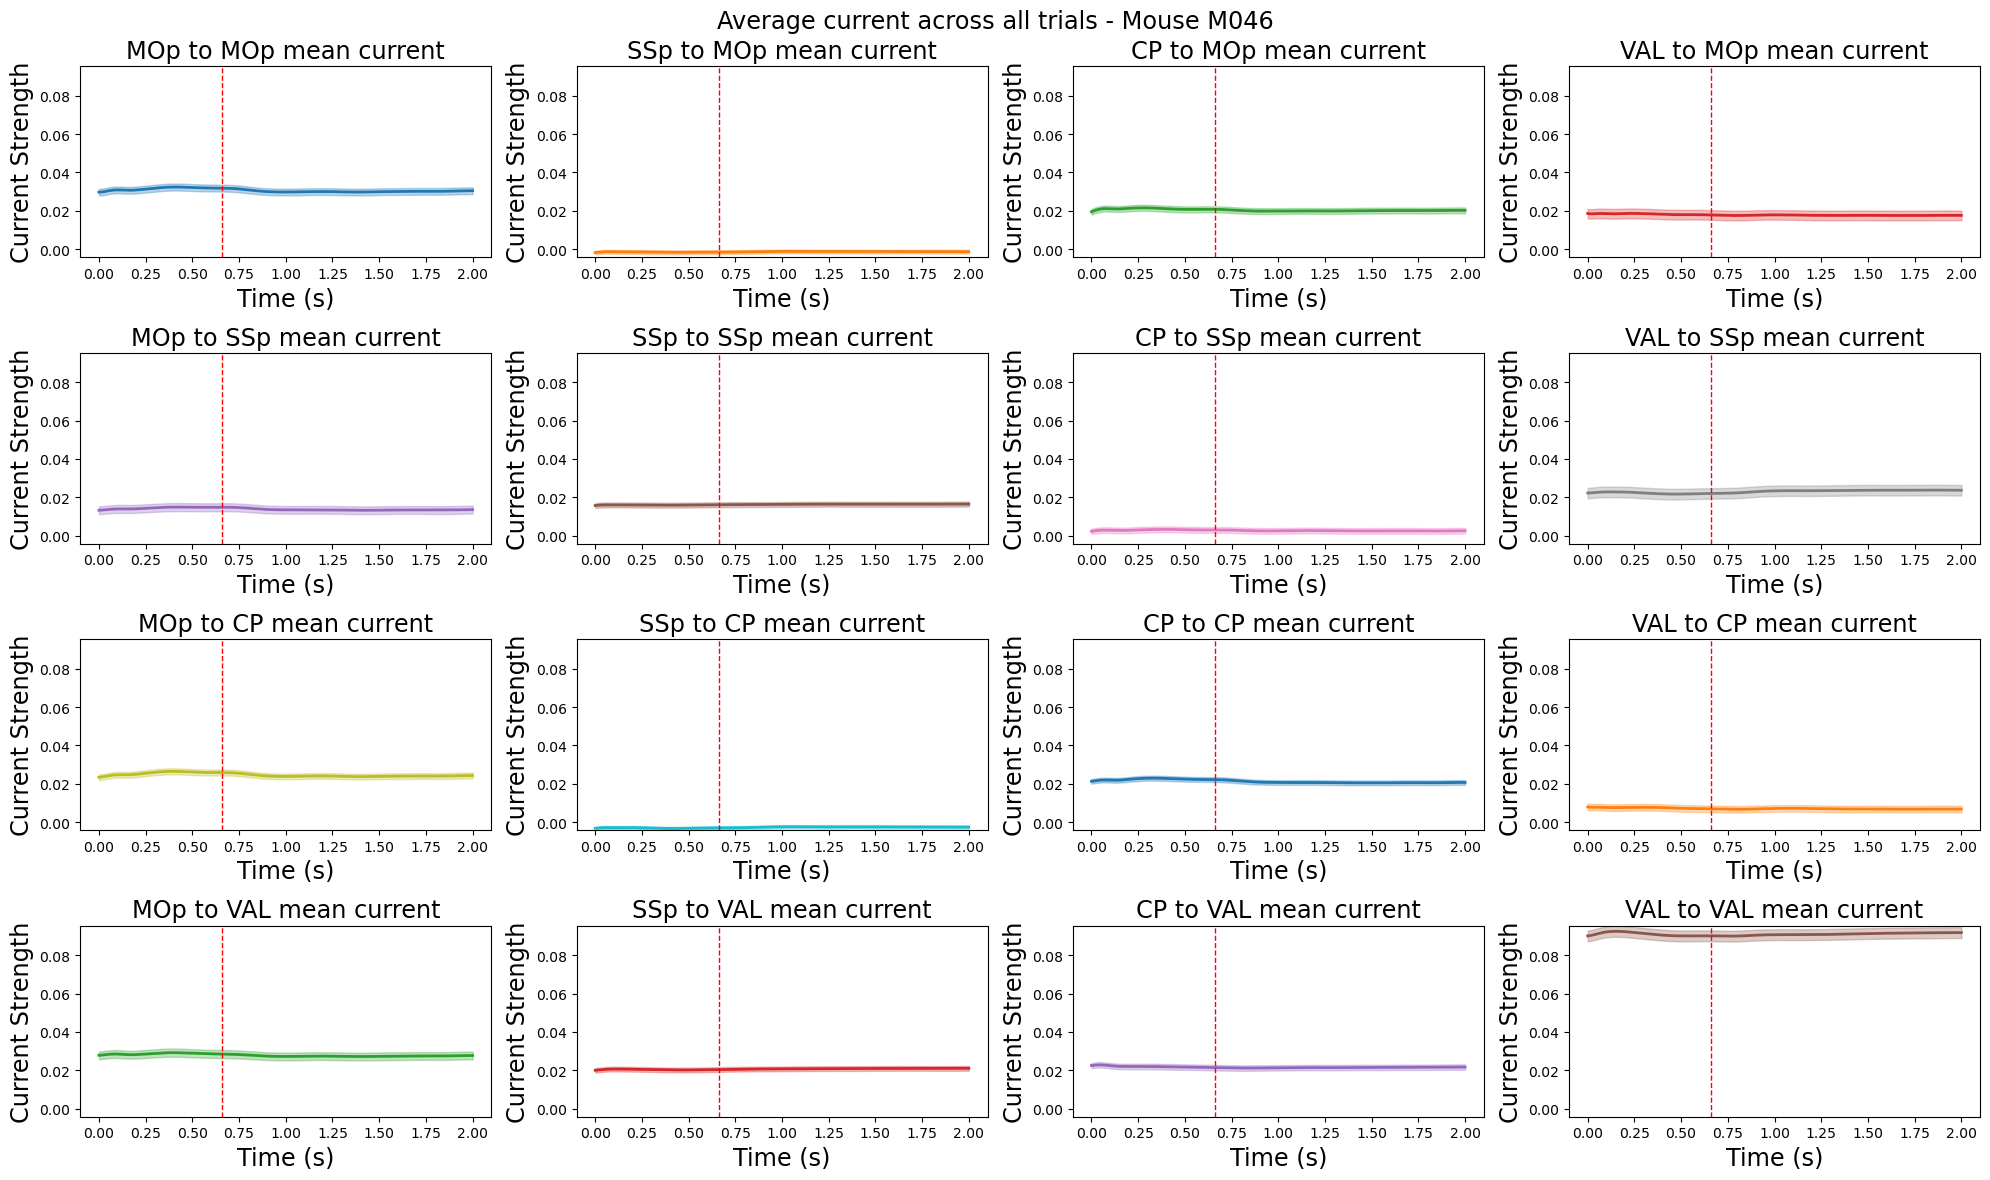

In [92]:
currents_fig = pltz.plot_currents_by_region(currents, current_labels, perturbation_time_sec, BIN_SIZE, dtFactor, mouse)

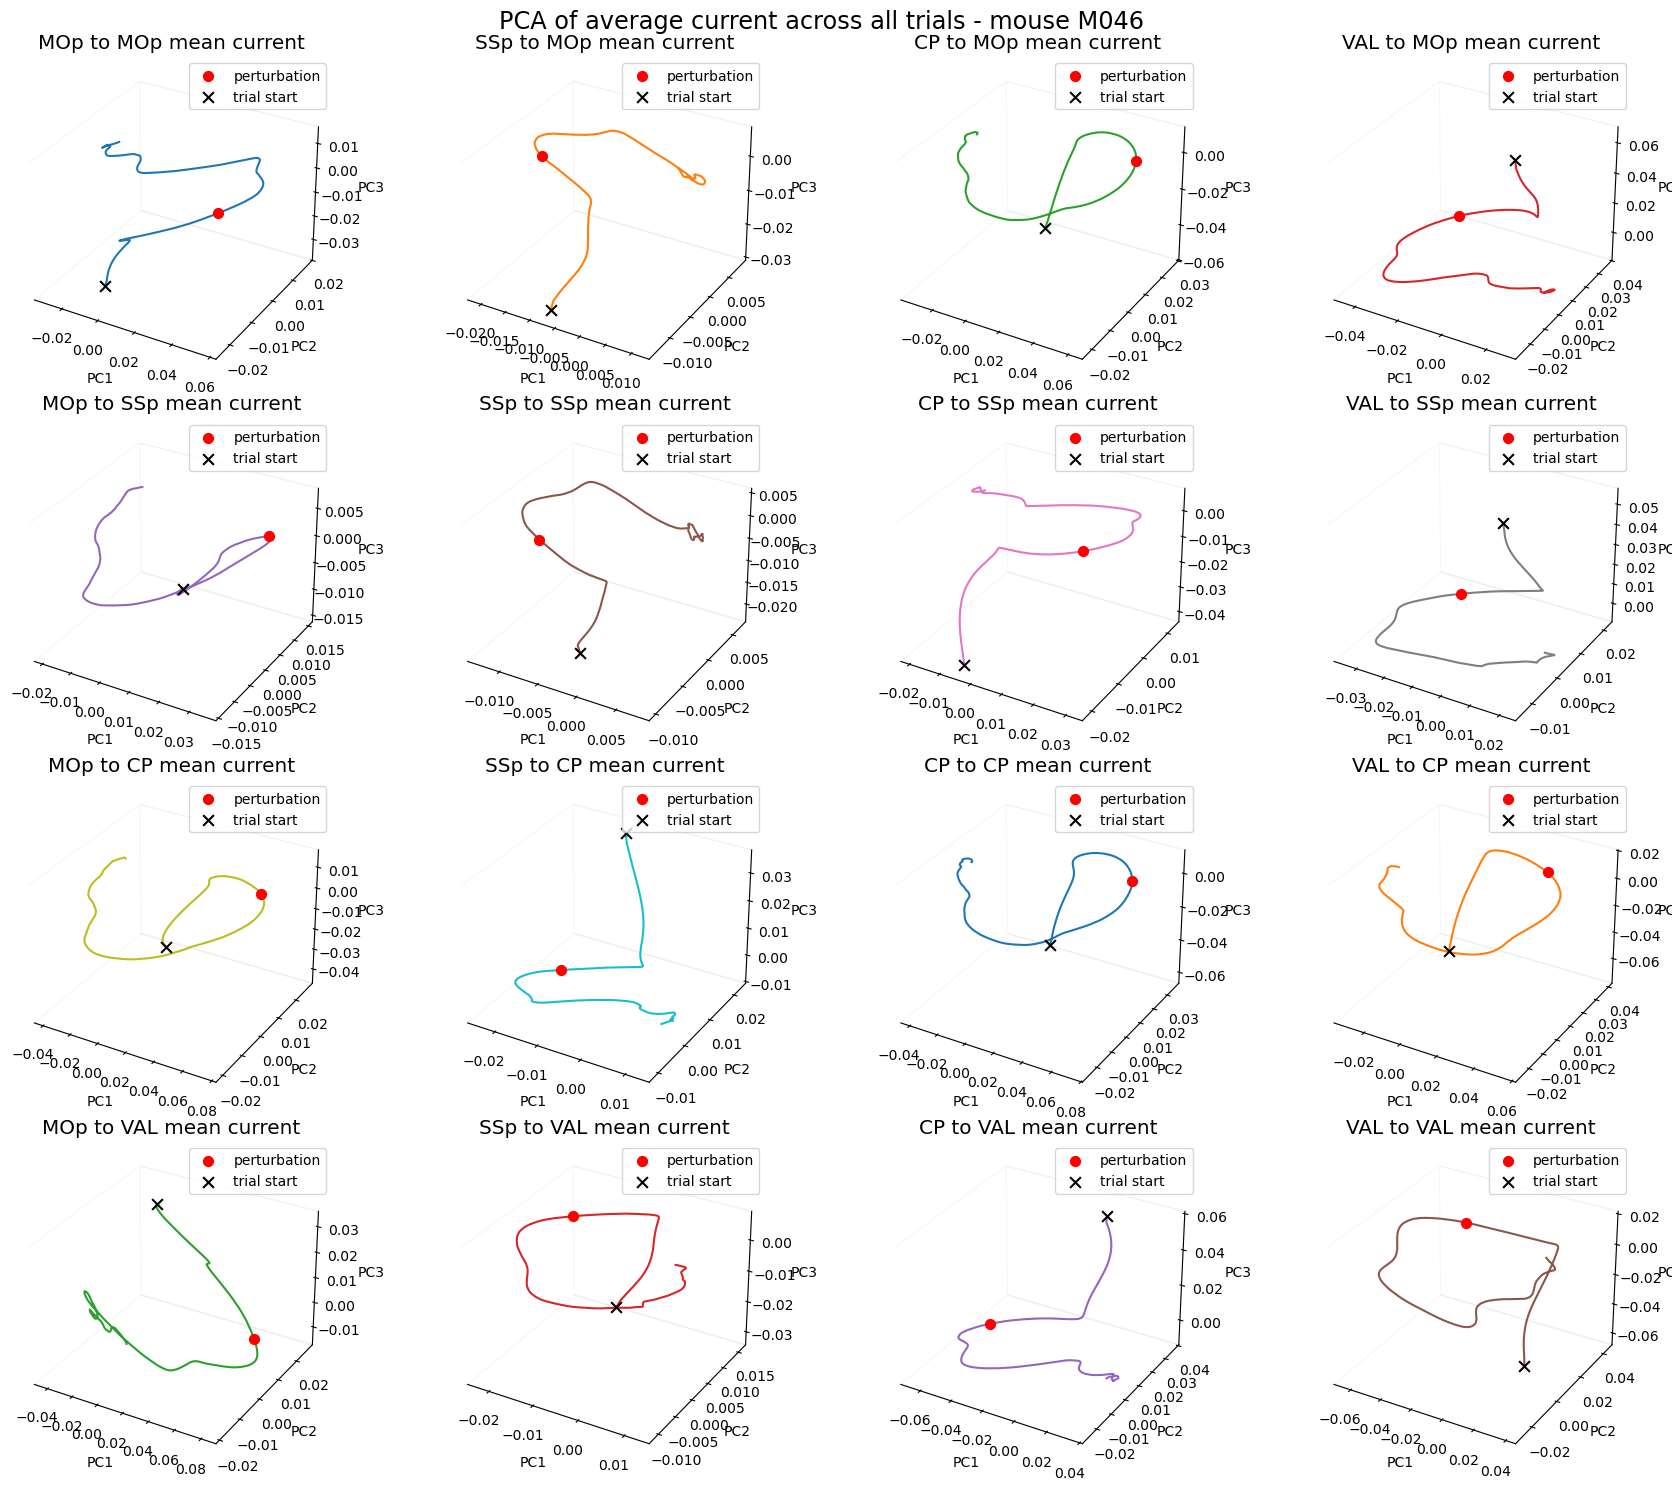

In [96]:
pca_current_fig = pltz.plot_pca_currents(currents, current_labels, perturbation_time, mouse, fig_size = (18, 15))

### Saving RNN model

In [125]:
rnn_model_to_save = rnn_model.copy()
try:
    if isinstance(rnn_model_to_save['params'].get('nonLinearity'), np.ufunc):
        rnn_model_to_save['params']['nonLinearity'] = rnn_model_to_save['params']['nonLinearity'].__name__
    savemat(f"rnn_model_{mouse}.mat", {"rnn_model": rnn_model_to_save})
except Exception as e:
    print(f"Error saving RNN model for mouse {mouse}:", e)